In [18]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
import math 
import random
%matplotlib inline


In [19]:
DATA_DIR_1= r'C:\Users\shart\OneDrive\Desktop\sample_project_1\CIFAR-10-images-master\train'
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATA_DIR_1,category)
        class_num=CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

                training_data.append([img_array,class_num]) 
            except Exception as e:  
                pass
        
create_training_data()
print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 8389.59it/s]

50000


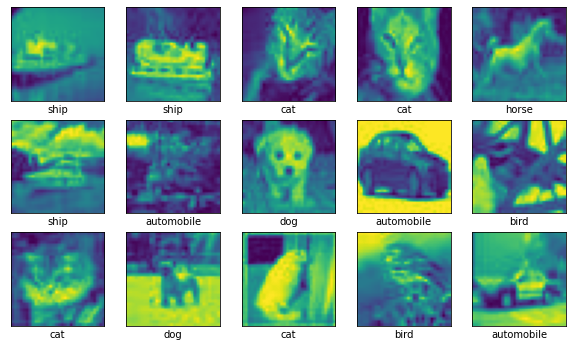

In [20]:
random.shuffle(training_data)

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_data[i][0])
    plt.xlabel(CATEGORIES[training_data[i][1]])
plt.show()

In [21]:
DATA_DIR_2= r'C:\Users\shart\OneDrive\Desktop\sample_project_1\CIFAR-10-images-master\test'
CATEGORIES=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

test_data=[]

def create_testing_data():
    for category in CATEGORIES:
        path=os.path.join(DATA_DIR_2,category)
        class_num=CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)

                test_data.append([img_array,class_num]) 
            except Exception as e:  
                pass
        
create_testing_data()
print(len(test_data))

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 8238.39it/s]

10000


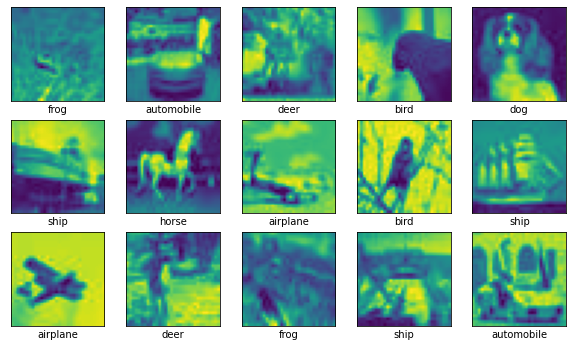

In [22]:
random.shuffle(test_data)

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i][0])
    plt.xlabel(CATEGORIES[test_data[i][1]])
plt.show()

In [23]:
def l1_distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(training_data)):
        x.append(np.sum(abs(np.subtract(training_data[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(training_data))): #for i in tqdm(range(0,len(train_data))):
            if np.sum(abs(np.subtract(training_data[i][0].flatten(),test.flatten())))==x[j]:
                #print(CATEGORIES[train_data[i][1]])
                prediction_array.append(training_data[i][1])
                break

    #print(prediction_array)
    
    check = []
    for i in range(0, len(CATEGORIES)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(CATEGORIES)):
        if check[final_prediction] == max(check):
            #print('Prediction : ' +CATEGORIES[final_prediction])
            return final_prediction

In [24]:
Single_Prediction = l1_distance_accuracy(test_data[1036][0],5)    #K =5
print('Prediction : ' + CATEGORIES[Single_Prediction])
print('Correct :' + CATEGORIES[test_data[1036][1]])

Prediction : bird
Correct :cat


Text(0.5, 0, 'cat')

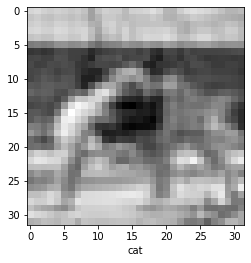

In [25]:
plt.imshow(test_data[1036][0],cmap=plt.cm.gray)
plt.xlabel(CATEGORIES[test_data[1036][1]])

In [26]:
x_train = []
y_train = []
x_test = []
y_test = []
IMG_SIZE = 32

In [27]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
    #print(" - ")
    
x_train= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


for features, label in test_data:
    x_test.append(features)
    y_test.append(label)
    #print(" \ ")
    
x_test= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [28]:
import pickle

pickle_out = open("x_train,pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train,pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("x_test,pickle","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test,pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [29]:
pickle_in = open("x_train,pickle","rb")
x_train = pickle.load(pickle_in)

pickle_in = open("y_train,pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("x_test,pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open("y_test,pickle","rb")
y_test = pickle.load(pickle_in)

In [30]:
accuracy = []

for k in range(1, 21):
    print("k: ", k)
    acc = []
    for f in range(5):
        validation_X, validation_Y = x_train[f*10000:(f+1)*10000], y_train[f*10000:(f+1)*10000]
        train_X = np.concatenate((x_train[:f*10000], x_train[(f+1)*10000:]), axis = 0)
        train_Y = np.concatenate((y_train[:f*10000], y_train[(f+1)*10000:]), axis = 0)
        #validation_X, validation_Y = x_train[f:(f+1)], y_train[f:(f+1)]
        #train_X = np.concatenate((x_train[:f], x_train[(f+1):]), axis = 0)
        #train_Y = np.concatenate((y_train[:f], y_train[(f+1):]), axis = 0)
        cm = ce = 0         

        for i in range(len(validation_X)):
            L1_distance = []
            L2_distance = []

            for j in range(len(train_X)):
                # calculating distance between two images
                l1 = np.sum(np.absolute(np.subtract(validation_X[i], train_X[j])))

                # calculation distance between two images
                l2 = np.sqrt(np.sum((validation_X[i] - train_X[j])**2))
               # print(train_Y[j],[0])
                L1_distance.append([l1, train_Y[j],[0]])
                L2_distance.append([l2, train_Y[j],[0]])
        
                if j == 300:
                    break
            np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
            L1_distance = np.array(L1_distance)
            L1_distance = L1_distance[L1_distance[:, 0].argsort()]
            L2_distance = np.array(L2_distance)
            L2_distance = L2_distance[L2_distance[:, 0].argsort()]
      
            # for manhattan distance
            values = L1_distance[:k, 1]

            # print(values)
            most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

            #print(most_frequent_value)
            if most_frequent_value == validation_Y[i]:
                cm += 1
        
            # for euclidean distance
            values = L2_distance[:k, 1]
            most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
            if most_frequent_value == validation_Y[i]:
                ce += 1

            if i == 120:
                break

        acc.append([cm/100, ce/100])
    accuracy.append([acc, k])

print(accuracy)


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
[[[[0.15, 0.17], [0.17, 0.15], [0.18, 0.2], [0.16, 0.15], [0.18, 0.17]], 1], [[[0.16, 0.13], [0.15, 0.15], [0.16, 0.12], [0.19, 0.14], [0.19, 0.19]], 2], [[[0.18, 0.1], [0.13, 0.21], [0.15, 0.1], [0.17, 0.13], [0.2, 0.19]], 3], [[[0.23, 0.11], [0.18, 0.21], [0.13, 0.14], [0.2, 0.13], [0.21, 0.19]], 4], [[[0.21, 0.14], [0.16, 0.19], [0.13, 0.15], [0.17, 0.15], [0.18, 0.19]], 5], [[[0.22, 0.16], [0.17, 0.19], [0.18, 0.13], [0.23, 0.13], [0.15, 0.19]], 6], [[[0.2, 0.21], [0.18, 0.17], [0.18, 0.15], [0.22, 0.13], [0.17, 0.19]], 7], [[[0.2, 0.19], [0.18, 0.18], [0.18, 0.1], [0.2, 0.13], [0.18, 0.2]], 8], [[[0.19, 0.2], [0.17, 0.21], [0.2, 0.11], [0.23, 0.15], [0.21, 0.18]], 9], [[[0.17, 0.19], [0.17, 0.2], [0.19, 0.08], [0.21, 0.16], [0.22, 0.19]], 10], [[[0.16, 0.18], [0.18, 0.2], [0.2, 0.09], [0.21, 0.18], [0.18, 0.2]], 11], [[[0.17, 0.21], [0.21, 0.17], [0.18

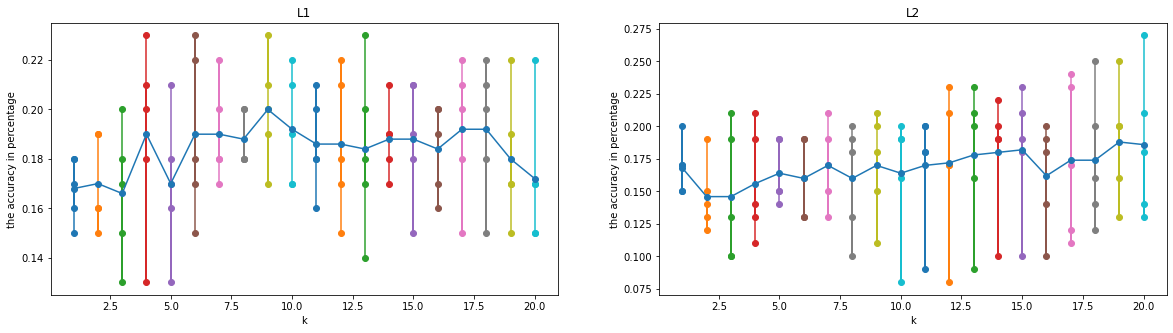

In [32]:
avg1 = []
avg2 = []
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)  
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('L1')

for i in range(len(accuracy)):
    a = np.full((5), i+1, dtype=int)
    l1 = np.array(accuracy[i][0])[:,0]
    avg1.append(np.average(l1))
    plt.plot(a, l1, 'o-')

plt.plot(k, avg1, 'o-')
plt.xlabel('k')
plt.ylabel('the accuracy in percentage')
plt.subplot(1,2,2)
plt.title('L2')


for i in range(len(accuracy)):
    a = np.full((5), i+1, dtype=int)
    l2 = np.array(accuracy[i][0])[:,1]
    avg2.append(np.average(l2))
    plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('k')
plt.ylabel('the accuracy in percentage')
  
plt.show()